# Reading Data & Manipulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

!pip install emoji
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English
import emoji
import spacy
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.exceptions import NotFittedError

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=d97b5f7e0b8d22255ebb9edbb5e3ba10e591b92e49dbe3b1c37ab4835f740cab
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
df = pd.read_excel('gmaps_filtering.xlsx')

In [3]:
df.head(5)

,author_title,author_id,review_text,review_rating,review_datetime_utc,review_likes
0,Gylang Aryandaru,102831225416478998528,Rumah sakit umum daerah solo merupakan salah s...,4.0,02/25/2022 17:18:08,26.0
1,Abdurrahman Suparno,113289066645944687499,saya pasien rujukan bpjs dilayani cukup baik d...,4.0,08/19/2022 07:32:33,9.0
2,Ale Sandra,109862689139307795990,Pelayanan nya dibagian loket memang lama dan a...,4.0,07/13/2022 02:49:56,18.0
3,Anita Andriyana,112922181388378935653,"Baikkkk bangeeettt puas bangeeettt disini, dar...",5.0,10/11/2022 01:09:55,1.0
4,Endraa,109566014005876676072,"Administrasinya diperbaiki, minta resume medis...",1.0,07/21/2022 17:19:56,19.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author_title         952 non-null    object 
 1   author_id            952 non-null    object 
 2   review_text          893 non-null    object 
 3   review_rating        952 non-null    float64
 4   review_datetime_utc  952 non-null    object 
 5   review_likes         952 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [5]:
df.isnull().sum()

author_title            47
author_id               47
review_text            106
review_rating           47
review_datetime_utc     47
review_likes            47
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 998
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author_title         893 non-null    object 
 1   author_id            893 non-null    object 
 2   review_text          893 non-null    object 
 3   review_rating        893 non-null    float64
 4   review_datetime_utc  893 non-null    object 
 5   review_likes         893 non-null    float64
dtypes: float64(2), object(4)
memory usage: 48.8+ KB


In [8]:
df.head()

,author_title,author_id,review_text,review_rating,review_datetime_utc,review_likes
0,Gylang Aryandaru,102831225416478998528,Rumah sakit umum daerah solo merupakan salah s...,4.0,02/25/2022 17:18:08,26.0
1,Abdurrahman Suparno,113289066645944687499,saya pasien rujukan bpjs dilayani cukup baik d...,4.0,08/19/2022 07:32:33,9.0
2,Ale Sandra,109862689139307795990,Pelayanan nya dibagian loket memang lama dan a...,4.0,07/13/2022 02:49:56,18.0
3,Anita Andriyana,112922181388378935653,"Baikkkk bangeeettt puas bangeeettt disini, dar...",5.0,10/11/2022 01:09:55,1.0
4,Endraa,109566014005876676072,"Administrasinya diperbaiki, minta resume medis...",1.0,07/21/2022 17:19:56,19.0


In [9]:
df.drop('author_id', inplace=True, axis=1)

In [10]:
df

,author_title,review_text,review_rating,review_datetime_utc,review_likes
0,Gylang Aryandaru,Rumah sakit umum daerah solo merupakan salah s...,4.0,02/25/2022 17:18:08,26.0
1,Abdurrahman Suparno,saya pasien rujukan bpjs dilayani cukup baik d...,4.0,08/19/2022 07:32:33,9.0
2,Ale Sandra,Pelayanan nya dibagian loket memang lama dan a...,4.0,07/13/2022 02:49:56,18.0
3,Anita Andriyana,"Baikkkk bangeeettt puas bangeeettt disini, dar...",5.0,10/11/2022 01:09:55,1.0
4,Endraa,"Administrasinya diperbaiki, minta resume medis...",1.0,07/21/2022 17:19:56,19.0
...,...,...,...,...,...
994,veronica wika,Rumah Sakit dengan pelayanan lengkap dan memua...,5.0,10/27/2020 02:04:56,0.0
995,bambang edy purwanto,maaf salah pencet...,1.0,05/25/2017 04:10:02,0.0
996,Tita Septiana,"Bersih, pelayanan baik, terpadu",5.0,06/29/2021 05:57:30,0.0
997,Rina Puspita,Masjidnya dalam tahap renovasi.,5.0,09/05/2017 07:25:52,1.0


In [11]:
df.tail(5)

,author_title,review_text,review_rating,review_datetime_utc,review_likes
994,veronica wika,Rumah Sakit dengan pelayanan lengkap dan memua...,5.0,10/27/2020 02:04:56,0.0
995,bambang edy purwanto,maaf salah pencet...,1.0,05/25/2017 04:10:02,0.0
996,Tita Septiana,"Bersih, pelayanan baik, terpadu",5.0,06/29/2021 05:57:30,0.0
997,Rina Puspita,Masjidnya dalam tahap renovasi.,5.0,09/05/2017 07:25:52,1.0
998,Tri Sunanto,Parkir gedung lantai 3,5.0,03/15/2018 12:29:46,0.0


In [12]:
df.to_excel("coba.xlsx")

In [13]:
df.reset_index()

,index,author_title,review_text,review_rating,review_datetime_utc,review_likes
0,0,Gylang Aryandaru,Rumah sakit umum daerah solo merupakan salah s...,4.0,02/25/2022 17:18:08,26.0
1,1,Abdurrahman Suparno,saya pasien rujukan bpjs dilayani cukup baik d...,4.0,08/19/2022 07:32:33,9.0
2,2,Ale Sandra,Pelayanan nya dibagian loket memang lama dan a...,4.0,07/13/2022 02:49:56,18.0
3,3,Anita Andriyana,"Baikkkk bangeeettt puas bangeeettt disini, dar...",5.0,10/11/2022 01:09:55,1.0
4,4,Endraa,"Administrasinya diperbaiki, minta resume medis...",1.0,07/21/2022 17:19:56,19.0
...,...,...,...,...,...,...
888,994,veronica wika,Rumah Sakit dengan pelayanan lengkap dan memua...,5.0,10/27/2020 02:04:56,0.0
889,995,bambang edy purwanto,maaf salah pencet...,1.0,05/25/2017 04:10:02,0.0
890,996,Tita Septiana,"Bersih, pelayanan baik, terpadu",5.0,06/29/2021 05:57:30,0.0
891,997,Rina Puspita,Masjidnya dalam tahap renovasi.,5.0,09/05/2017 07:25:52,1.0


In [14]:
df.describe()

,review_rating,review_likes
count,893.000000,893.000000
mean,3.516237,1.776036
std,1.639963,4.144423
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,2.000000
max,5.000000,42.000000


In [15]:
df.shape

(893, 5)

# Preprocessing

In [16]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


## 1. Case Folding

In [17]:
#Mengubah text menjadi lowercase

df['review_text'] = df['review_text'].str.lower()

In [18]:
#html dan noise text
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review_text']=df['review_text'].apply(denoise_text)

<ipython-input-18-2882a6bada4e>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [19]:
#hapus special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review_text']=df['review_text'].apply(remove_special_characters)

In [20]:
#hapus whitespace
df['review_text']=df['review_text'].str.strip()

In [21]:
#hapus emoji
!pip install emot
import re
import pickle
from emoji import EMOJI_DATA
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['review_text']=df['review_text'].apply(remove_emoji)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 3.9 MB/s eta 0:00:00


##Tokenizing, Stopwords, Stemming

In [22]:
# Importing stop words from NLTK coupus and word tokenizer
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df['review_token'] = df['review_text'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Created new columns of tokens - where stop words are being removed
df['review_token_filtered'] = df['review_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
df[['review_token', 'review_token_filtered']].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review_token,review_token_filtered
0,"[rumah, sakit, umum, daerah, solo, merupakan, ...","[rumah, sakit, daerah, solo, salah, rumah, sak..."
1,"[saya, pasien, rujukan, bpjs, dilayani, cukup,...","[pasien, rujukan, bpjs, dilayani, pendaftaran,..."
2,"[pelayanan, nya, dibagian, loket, memang, lama...","[pelayanan, nya, dibagian, loket, anehnomor, a..."
3,"[baikkkk, bangeeettt, puas, bangeeettt, disini...","[baikkkk, bangeeettt, puas, bangeeettt, 2018, ..."
4,"[administrasinya, diperbaiki, minta, resume, m...","[administrasinya, diperbaiki, resume, medis, a..."
5,"[mertua, pernah, masuk, ke, rumah, sakit, ini,...","[mertua, masuk, rumah, sakit, dirawat, ruang, ..."
6,"[untuk, pertama, kali, kesana, agak, bingung, ...","[kali, kesana, bingung, sih, parkir, tenang, p..."
7,"[dengan, fasilitas, daftar, online, makin, cep...","[fasilitas, daftar, online, cepat, pegawai, pr..."
8,"[pak, tolong, tukang, fotokopi, dilantai, 1, d...","[tolong, tukang, fotokopi, dilantai, 1, diajar..."
9,"[pelayanan, cepatprofesional, tidak, membedabe...","[pelayanan, cepatprofesional, membedabedakan, ..."


In [24]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 9.9 MB/s eta 0:00:00


In [25]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['review_stemmed'] = df['review_token_filtered'].apply(lambda x: ' '.join([stemmer.stem(i) for i in x]))
df['review_stemmed'].head(10)

0    rumah sakit daerah solo salah rumah sakit ruju...
1    pasien rujuk bpjs layan daftar ribet extra sab...
2    layan nya bagi loket anehnomor antri panggil d...
3    baikkkk bangeeettt puas bangeeettt 2018 rawat ...
4    administrasi baik resume medis aja lempar kesa...
5    mertua masuk rumah sakit rawat ruang x rujuk p...
6    kali kesana bingung sih parkir tenang tunjuk j...
7    fasilitas daftar online cepat pegawai pria wan...
8    tolong tukang fotokopi lantai 1 ajar atitude b...
9    layan cepatprofesional membedabedakan terimaka...
Name: review_stemmed, dtype: object

In [26]:
df

,author_title,review_text,review_rating,review_datetime_utc,review_likes,review_token,review_token_filtered,review_stemmed
0,Gylang Aryandaru,rumah sakit umum daerah solo merupakan salah s...,4.0,02/25/2022 17:18:08,26.0,"[rumah, sakit, umum, daerah, solo, merupakan, ...","[rumah, sakit, daerah, solo, salah, rumah, sak...",rumah sakit daerah solo salah rumah sakit ruju...
1,Abdurrahman Suparno,saya pasien rujukan bpjs dilayani cukup baik d...,4.0,08/19/2022 07:32:33,9.0,"[saya, pasien, rujukan, bpjs, dilayani, cukup,...","[pasien, rujukan, bpjs, dilayani, pendaftaran,...",pasien rujuk bpjs layan daftar ribet extra sab...
2,Ale Sandra,pelayanan nya dibagian loket memang lama dan a...,4.0,07/13/2022 02:49:56,18.0,"[pelayanan, nya, dibagian, loket, memang, lama...","[pelayanan, nya, dibagian, loket, anehnomor, a...",layan nya bagi loket anehnomor antri panggil d...
3,Anita Andriyana,baikkkk bangeeettt puas bangeeettt disini dari...,5.0,10/11/2022 01:09:55,1.0,"[baikkkk, bangeeettt, puas, bangeeettt, disini...","[baikkkk, bangeeettt, puas, bangeeettt, 2018, ...",baikkkk bangeeettt puas bangeeettt 2018 rawat ...
4,Endraa,administrasinya diperbaiki minta resume medis ...,1.0,07/21/2022 17:19:56,19.0,"[administrasinya, diperbaiki, minta, resume, m...","[administrasinya, diperbaiki, resume, medis, a...",administrasi baik resume medis aja lempar kesa...
...,...,...,...,...,...,...,...,...
994,veronica wika,rumah sakit dengan pelayanan lengkap dan memua...,5.0,10/27/2020 02:04:56,0.0,"[rumah, sakit, dengan, pelayanan, lengkap, dan...","[rumah, sakit, pelayanan, lengkap, memuaskan]",rumah sakit layan lengkap muas
995,bambang edy purwanto,maaf salah pencet,1.0,05/25/2017 04:10:02,0.0,"[maaf, salah, pencet]","[maaf, salah, pencet]",maaf salah pencet
996,Tita Septiana,bersih pelayanan baik terpadu,5.0,06/29/2021 05:57:30,0.0,"[bersih, pelayanan, baik, terpadu]","[bersih, pelayanan, terpadu]",bersih layan padu
997,Rina Puspita,masjidnya dalam tahap renovasi,5.0,09/05/2017 07:25:52,1.0,"[masjidnya, dalam, tahap, renovasi]","[masjidnya, tahap, renovasi]",masjid tahap renovasi


# Visualisasi

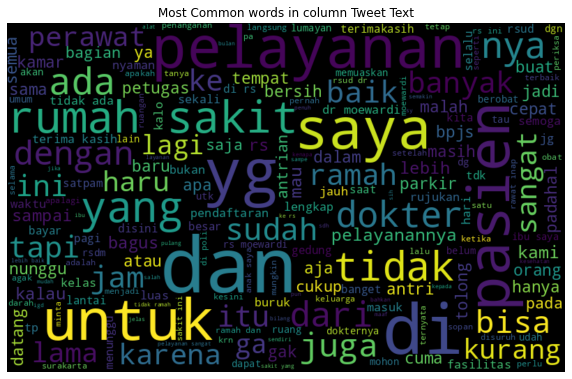

In [27]:
#visualizing all the words in column "review_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['review_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Text")
plt.show()

# TF-IDF Features

In [31]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words=my_stop_words)
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [58]:
# TF-IDF feature matrix - For columns "df['review_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(df['review_text'])
tfidf_stem

InvalidParameterError: ignored

# Labelling

## VADER

In [33]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [34]:
df['scores'] = df['review_text'].apply(lambda review: sid.polarity_scores(review))

df.head()

,author_title,review_text,review_rating,review_datetime_utc,review_likes,review_token,review_token_filtered,review_stemmed,scores
0,Gylang Aryandaru,rumah sakit umum daerah solo merupakan salah s...,4.0,02/25/2022 17:18:08,26.0,"[rumah, sakit, umum, daerah, solo, merupakan, ...","[rumah, sakit, daerah, solo, salah, rumah, sak...",rumah sakit daerah solo salah rumah sakit ruju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Abdurrahman Suparno,saya pasien rujukan bpjs dilayani cukup baik d...,4.0,08/19/2022 07:32:33,9.0,"[saya, pasien, rujukan, bpjs, dilayani, cukup,...","[pasien, rujukan, bpjs, dilayani, pendaftaran,...",pasien rujuk bpjs layan daftar ribet extra sab...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Ale Sandra,pelayanan nya dibagian loket memang lama dan a...,4.0,07/13/2022 02:49:56,18.0,"[pelayanan, nya, dibagian, loket, memang, lama...","[pelayanan, nya, dibagian, loket, anehnomor, a...",layan nya bagi loket anehnomor antri panggil d...,"{'neg': 0.007, 'neu': 0.993, 'pos': 0.0, 'comp..."
3,Anita Andriyana,baikkkk bangeeettt puas bangeeettt disini dari...,5.0,10/11/2022 01:09:55,1.0,"[baikkkk, bangeeettt, puas, bangeeettt, disini...","[baikkkk, bangeeettt, puas, bangeeettt, 2018, ...",baikkkk bangeeettt puas bangeeettt 2018 rawat ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Endraa,administrasinya diperbaiki minta resume medis ...,1.0,07/21/2022 17:19:56,19.0,"[administrasinya, diperbaiki, minta, resume, m...","[administrasinya, diperbaiki, resume, medis, a...",administrasi baik resume medis aja lempar kesa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [35]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,author_title,review_text,review_rating,review_datetime_utc,review_likes,review_token,review_token_filtered,review_stemmed,scores,compound
0,Gylang Aryandaru,rumah sakit umum daerah solo merupakan salah s...,4.0,02/25/2022 17:18:08,26.0,"[rumah, sakit, umum, daerah, solo, merupakan, ...","[rumah, sakit, daerah, solo, salah, rumah, sak...",rumah sakit daerah solo salah rumah sakit ruju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Abdurrahman Suparno,saya pasien rujukan bpjs dilayani cukup baik d...,4.0,08/19/2022 07:32:33,9.0,"[saya, pasien, rujukan, bpjs, dilayani, cukup,...","[pasien, rujukan, bpjs, dilayani, pendaftaran,...",pasien rujuk bpjs layan daftar ribet extra sab...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Ale Sandra,pelayanan nya dibagian loket memang lama dan a...,4.0,07/13/2022 02:49:56,18.0,"[pelayanan, nya, dibagian, loket, memang, lama...","[pelayanan, nya, dibagian, loket, anehnomor, a...",layan nya bagi loket anehnomor antri panggil d...,"{'neg': 0.007, 'neu': 0.993, 'pos': 0.0, 'comp...",-0.1027
3,Anita Andriyana,baikkkk bangeeettt puas bangeeettt disini dari...,5.0,10/11/2022 01:09:55,1.0,"[baikkkk, bangeeettt, puas, bangeeettt, disini...","[baikkkk, bangeeettt, puas, bangeeettt, 2018, ...",baikkkk bangeeettt puas bangeeettt 2018 rawat ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Endraa,administrasinya diperbaiki minta resume medis ...,1.0,07/21/2022 17:19:56,19.0,"[administrasinya, diperbaiki, minta, resume, m...","[administrasinya, diperbaiki, resume, medis, a...",administrasi baik resume medis aja lempar kesa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [36]:
# df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

# df.head()

In [37]:
df['type']=''
df.loc[df.compound>=0,'type']=1
df.loc[df.compound<0,'type']=0
df.head(15)

,author_title,review_text,review_rating,review_datetime_utc,review_likes,review_token,review_token_filtered,review_stemmed,scores,compound,type
0,Gylang Aryandaru,rumah sakit umum daerah solo merupakan salah s...,4.0,02/25/2022 17:18:08,26.0,"[rumah, sakit, umum, daerah, solo, merupakan, ...","[rumah, sakit, daerah, solo, salah, rumah, sak...",rumah sakit daerah solo salah rumah sakit ruju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1,Abdurrahman Suparno,saya pasien rujukan bpjs dilayani cukup baik d...,4.0,08/19/2022 07:32:33,9.0,"[saya, pasien, rujukan, bpjs, dilayani, cukup,...","[pasien, rujukan, bpjs, dilayani, pendaftaran,...",pasien rujuk bpjs layan daftar ribet extra sab...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,Ale Sandra,pelayanan nya dibagian loket memang lama dan a...,4.0,07/13/2022 02:49:56,18.0,"[pelayanan, nya, dibagian, loket, memang, lama...","[pelayanan, nya, dibagian, loket, anehnomor, a...",layan nya bagi loket anehnomor antri panggil d...,"{'neg': 0.007, 'neu': 0.993, 'pos': 0.0, 'comp...",-0.1027,0
3,Anita Andriyana,baikkkk bangeeettt puas bangeeettt disini dari...,5.0,10/11/2022 01:09:55,1.0,"[baikkkk, bangeeettt, puas, bangeeettt, disini...","[baikkkk, bangeeettt, puas, bangeeettt, 2018, ...",baikkkk bangeeettt puas bangeeettt 2018 rawat ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
4,Endraa,administrasinya diperbaiki minta resume medis ...,1.0,07/21/2022 17:19:56,19.0,"[administrasinya, diperbaiki, minta, resume, m...","[administrasinya, diperbaiki, resume, medis, a...",administrasi baik resume medis aja lempar kesa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
5,Teguh Nugroho,mertua pernah masuk ke rumah sakit ini dirawat...,1.0,11/14/2022 23:59:24,22.0,"[mertua, pernah, masuk, ke, rumah, sakit, ini,...","[mertua, masuk, rumah, sakit, dirawat, ruang, ...",mertua masuk rumah sakit rawat ruang x rujuk p...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
6,Nur Qoyyuum I C,untuk pertama kali kesana agak bingung sih ter...,5.0,07/05/2022 05:35:40,2.0,"[untuk, pertama, kali, kesana, agak, bingung, ...","[kali, kesana, bingung, sih, parkir, tenang, p...",kali kesana bingung sih parkir tenang tunjuk j...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
7,Dicky Jito Andrianto,dengan fasilitas daftar online makin cepat se...,5.0,01/03/2020 01:40:03,9.0,"[dengan, fasilitas, daftar, online, makin, cep...","[fasilitas, daftar, online, cepat, pegawai, pr...",fasilitas daftar online cepat pegawai pria wan...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
8,S Pambudi,pak tolong tukang fotokopi dilantai 1 diajari ...,1.0,12/22/2022 01:25:49,4.0,"[pak, tolong, tukang, fotokopi, dilantai, 1, d...","[tolong, tukang, fotokopi, dilantai, 1, diajar...",tolong tukang fotokopi lantai 1 ajar atitude b...,"{'neg': 0.0, 'neu': 0.972, 'pos': 0.028, 'comp...",0.0516,1
9,SobatSambat,pelayanan cepatprofesional tidak membedabedaka...,5.0,09/24/2022 19:44:55,3.0,"[pelayanan, cepatprofesional, tidak, membedabe...","[pelayanan, cepatprofesional, membedabedakan, ...",layan cepatprofesional membedabedakan terimaka...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1


# Feature Engineer

In [38]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [39]:
# creating the Bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(df['review_text']).toarray()
y=df.iloc[:,4].values

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Modelling

## SVM

In [41]:
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install lime
from lime import lime_tabular
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=86e4509236f239a5a70139f0f0ebf7c53549202dfb0b9280825d4064caed483f
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [42]:
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Are under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc

In [43]:
df['type'] = df['type'].astype(int)

In [44]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df.review_text)
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, df['type'], random_state=42)

Train confusion matrix is: 
[[  5  25]
 [  0 639]]

Test confusion matrix is: 
[[  0  17]
 [  0 207]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.92      1.00      0.96       207

    accuracy                           0.92       224
   macro avg       0.46      0.50      0.48       224
weighted avg       0.85      0.92      0.89       224


Train accuracy score:  0.9626307922272048
Test accuracy score:  0.9241071428571429

Train ROC-AUC score:  1.0
Test ROC-AUC score:  0.9113384484228475

Are under Precision-Recall curve: 0.9605568445475638
Area under ROC-AUC: 0.9923581316557599


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


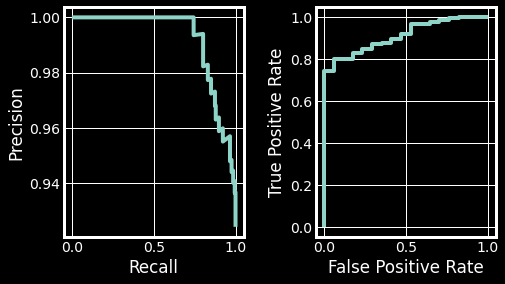

In [45]:
SVM = svm.SVC(probability=True)
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM,x_train, x_test, y_train, y_test)

In [46]:
def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

In [47]:
# Tuning the hyperparameters
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}



svm_optimal = grid_search(svm.SVC(probability=True), parameters,x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=auto, ke

Train confusion matrix is: 
[[  0  30]
 [  0 639]]

Test confusion matrix is: 
[[  0  17]
 [  0 207]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.92      1.00      0.96       207

    accuracy                           0.92       224
   macro avg       0.46      0.50      0.48       224
weighted avg       0.85      0.92      0.89       224


Train accuracy score:  0.9551569506726457
Test accuracy score:  0.9241071428571429

Train ROC-AUC score:  1.0
Test ROC-AUC score:  0.8792270531400966

Are under Precision-Recall curve: 0.9605568445475638
Area under ROC-AUC: 0.9886244232040304


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


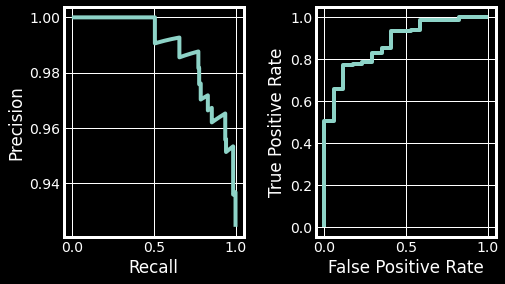

In [48]:
so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc = check_scores(svm_optimal,x_train, x_test, y_train, y_test)

## Multinomial Naive Bayes

Train confusion matrix is: 
[[  0  30]
 [  0 639]]

Test confusion matrix is: 
[[  0  17]
 [  0 207]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.92      1.00      0.96       207

    accuracy                           0.92       224
   macro avg       0.46      0.50      0.48       224
weighted avg       0.85      0.92      0.89       224


Train accuracy score:  0.9551569506726457
Test accuracy score:  0.9241071428571429

Train ROC-AUC score:  0.7426186750130412
Test ROC-AUC score:  0.5163398692810457

Are under Precision-Recall curve: 0.9605568445475638
Area under ROC-AUC: 0.9350524523062907


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


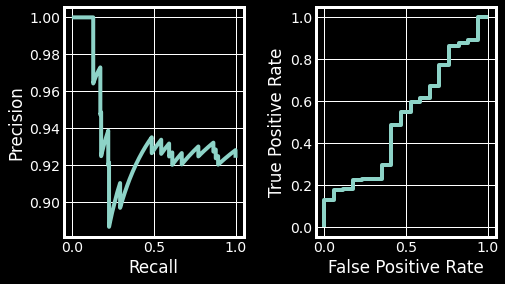

In [49]:
m_train_accuracy, m_test_accuracy, m_train_auc, m_test_auc = check_scores(MultinomialNB(),x_train, x_test, y_train, y_test)

## Gaussian Naive Bayes

Train confusion matrix is: 
[[ 30   0]
 [ 87 552]]

Test confusion matrix is: 
[[  0  17]
 [ 46 161]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.90      0.78      0.84       207

    accuracy                           0.72       224
   macro avg       0.45      0.39      0.42       224
weighted avg       0.84      0.72      0.77       224


Train accuracy score:  0.8699551569506726
Test accuracy score:  0.71875

Train ROC-AUC score:  0.931924882629108
Test ROC-AUC score:  0.3888888888888889

Are under Precision-Recall curve: 0.8363636363636364
Area under ROC-AUC: 0.9438146513286964


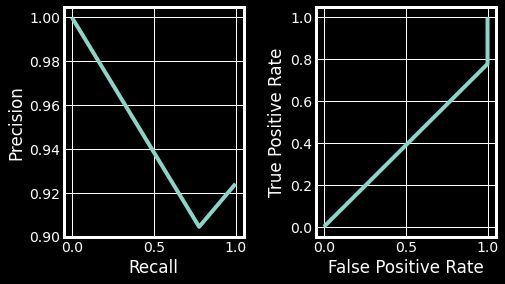

In [50]:
g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc=check_scores(GaussianNB(),x_train.toarray(), x_test.toarray(), y_train, y_test)

## AdaBoost

Train confusion matrix is: 
[[ 30   0]
 [  0 639]]

Test confusion matrix is: 
[[ 10   7]
 [  1 206]]

              precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.97      1.00      0.98       207

    accuracy                           0.96       224
   macro avg       0.94      0.79      0.85       224
weighted avg       0.96      0.96      0.96       224


Train accuracy score:  1.0
Test accuracy score:  0.9642857142857143

Train ROC-AUC score:  1.0
Test ROC-AUC score:  0.9059391872691105

Are under Precision-Recall curve: 0.9809523809523809
Area under ROC-AUC: 0.9894253691539243


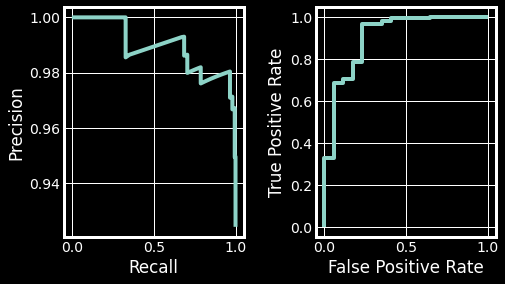

In [51]:
a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=check_scores(AdaBoostClassifier(),x_train,x_test, y_train, y_test)

In [52]:
params = {'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

ada_optimal_model = grid_search(AdaBoostClassifier(), params,x_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=   2.4s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=   2.3s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=50; total time=   0.3s
[CV] END algor

Train confusion matrix is: 
[[  6  24]
 [  0 639]]

Test confusion matrix is: 
[[  0  17]
 [  0 207]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.92      1.00      0.96       207

    accuracy                           0.92       224
   macro avg       0.46      0.50      0.48       224
weighted avg       0.85      0.92      0.89       224


Train accuracy score:  0.9641255605381166
Test accuracy score:  0.9241071428571429



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train ROC-AUC score:  0.9891236306729265
Test ROC-AUC score:  0.9327934072179596

Are under Precision-Recall curve: 0.9605568445475638
Area under ROC-AUC: 0.9937139740394928


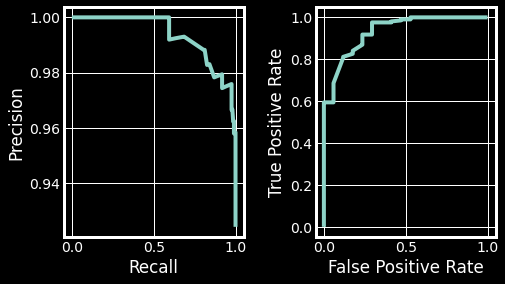

In [53]:
ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc=check_scores(ada_optimal_model,x_train,x_test, y_train, y_test)

## Bagging with MultinomialNB

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train confusion matrix is: 
[[  0  30]
 [  0 639]]

Test confusion matrix is: 
[[  0  17]
 [  0 207]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.92      1.00      0.96       207

    accuracy                           0.92       224
   macro avg       0.46      0.50      0.48       224
weighted avg       0.85      0.92      0.89       224


Train accuracy score:  0.9551569506726457
Test accuracy score:  0.9241071428571429



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train ROC-AUC score:  0.7769431403234219
Test ROC-AUC score:  0.5194657573174197

Are under Precision-Recall curve: 0.9605568445475638
Area under ROC-AUC: 0.935783979514959


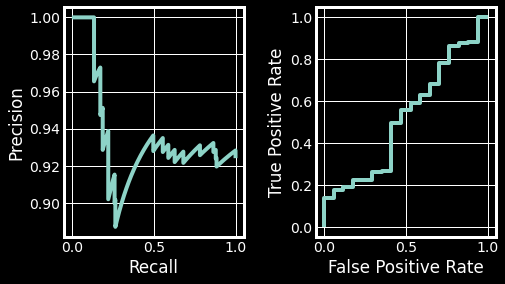

In [54]:
kfold = model_selection.KFold(n_splits = 3)
  
# bagging classifier
model = BaggingClassifier(base_estimator = MultinomialNB(),
                          n_estimators = 100)

b_train_accuracy, b_test_accuracy, b_train_auc, b_test_auc= check_scores(model,x_train,x_test, y_train, y_test)

## Random Forest

Train confusion matrix is: 
[[ 30   0]
 [  0 639]]

Test confusion matrix is: 
[[  0  17]
 [  0 207]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.92      1.00      0.96       207

    accuracy                           0.92       224
   macro avg       0.46      0.50      0.48       224
weighted avg       0.85      0.92      0.89       224


Train accuracy score:  1.0
Test accuracy score:  0.9241071428571429

Train ROC-AUC score:  1.0
Test ROC-AUC score:  0.9680306905370843

Are under Precision-Recall curve: 0.9605568445475638
Area under ROC-AUC: 0.9973167302785091


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


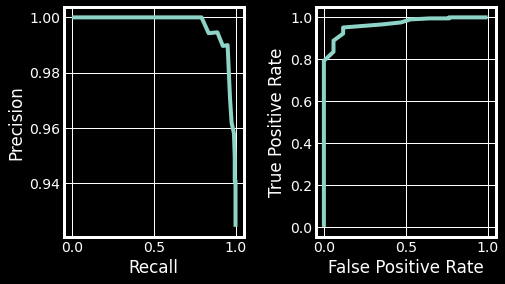

In [55]:
r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc= check_scores(RandomForestClassifier(random_state=0).fit(x_train, y_train), x_train,x_test,y_train,y_test)

## Bernoulli Naive Bayes


Train confusion matrix is: 
[[  7  23]
 [ 12 627]]

Test confusion matrix is: 
[[  2  15]
 [  6 201]]

              precision    recall  f1-score   support

           0       0.25      0.12      0.16        17
           1       0.93      0.97      0.95       207

    accuracy                           0.91       224
   macro avg       0.59      0.54      0.56       224
weighted avg       0.88      0.91      0.89       224


Train accuracy score:  0.9476831091180867
Test accuracy score:  0.90625

Train ROC-AUC score:  0.6215440792905582
Test ROC-AUC score:  0.5448991190679171

Are under Precision-Recall curve: 0.9503546099290779
Area under ROC-AUC: 0.9642173012693306


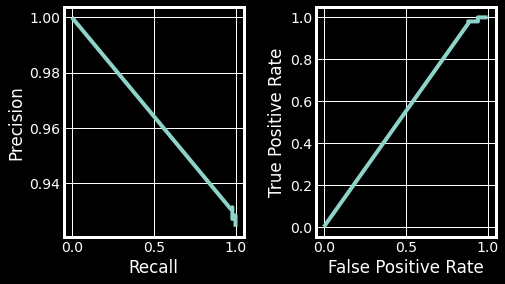

In [56]:
from sklearn.naive_bayes import BernoulliNB 

bnb_train_accuracy, bnb_test_accuracy, bnb_train_auc, bnb_test_auc = check_scores(BernoulliNB(),x_train, x_test, y_train, y_test)

# Final Results

In [57]:
data = [('Random Forest', r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc),
 ('Multinomial Naive Bayes',m_train_accuracy, m_test_accuracy, m_train_auc, m_test_auc  ),
('Bagged Multinomial Naive Bayes',b_train_accuracy, b_test_accuracy, b_train_auc, b_test_auc ),
 ('AdaBoost',a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc ),
('AdaBoost Optimized',ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc),
('Gaussian Naive Bayes',g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc),
('Bernoulli Naive Bayes',bnb_train_accuracy, bnb_test_accuracy, bnb_train_auc, bnb_test_auc),
('SVM', s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc),
('SVM Optimized', so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc)]


Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy', 'Train ROC', 'Test ROC'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy,Train ROC,Test ROC
Model Name,,,,
Random Forest,1.000000,0.924107,1.000000,0.968031
Multinomial Naive Bayes,0.955157,0.924107,0.742619,0.516340
Bagged Multinomial Naive Bayes,0.955157,0.924107,0.776943,0.519466
AdaBoost,1.000000,0.964286,1.000000,0.905939
AdaBoost Optimized,0.964126,0.924107,0.989124,0.932793
Gaussian Naive Bayes,0.869955,0.718750,0.931925,0.388889
Bernoulli Naive Bayes,0.947683,0.906250,0.621544,0.544899
SVM,0.962631,0.924107,1.000000,0.911338
SVM Optimized,0.955157,0.924107,1.000000,0.879227
